# 1. Data collection
# 2. Data description
# 3. Regression Analysis
# 4. Sentiment Analysis

    4.1 Afinn: Wordlist-based approch
    
    4.2 Bert
    
    4.3 Distilbert
    
    4.4 twitter-roberta
    
    4.5 reg with sentiment scores
    
    4.6 another method: supervised machine learning (self trainning sentiment classifiers)

In [5]:
# '''import all necessary packages'''

import numpy as np
import pandas as pd
import re

# for regression
from statsmodels.formula.api import ols

# for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk
nltk.download('vader_lexicon')

from transformers import pipeline

from stargazer.stargazer import Stargazer

from afinn import Afinn
from tqdm.auto import tqdm
tqdm.pandas()

# for visulization
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
# pip install SciencePlots
# pip install git+https://github.com/garrettj403/SciencePlots
# pip install --upgrade pip
import scienceplots
plt.style.use('science')

# for supervised machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from nltk.tokenize import TweetTokenizer
from collections import Counter

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/buluo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# 2. Data description

In [67]:
DOG_Nov_Dec = pd.read_csv('Reddit data/DOG_Nov3_Dec.csv')
DOG_Jan_March = pd.read_csv('Reddit data/DOG_Jan_March.csv')

In [126]:
DOG_Jan_March[['url']][18:19]

,url
18,https://www.reddit.com/r/dogecoin/comments/11y...


In [142]:
DOG_Jan_March['selftext'][30:50]

30                                                  NaN
31                                                  NaN
32                                                  NaN
33                                                  NaN
34                                                  NaN
35                                                  NaN
36                                                  NaN
37                                            [removed]
38                                                  NaN
39                                                  NaN
40                                                  NaN
41                                            [removed]
42                                                  NaN
43                                                  NaN
44                                                  NaN
45    Hi Shibes,\n\nWelcome to todays Daily Discussi...
46    &amp;#x200B;\n\n*Processing video ssfhwe1dn9pa...
47                                              

In [68]:
used_DOG_Nov_Dec = DOG_Nov_Dec[['subreddit', 'selftext', 'title','author','is_video','utc_datetime_str']]
used_DOG_Jan_March = DOG_Jan_March[['subreddit', 'selftext', 'title','author','is_video','utc_datetime_str']]

In [69]:
DOG = pd.concat([used_DOG_Nov_Dec, used_DOG_Jan_March])
print(DOG.shape)
DOG = DOG.drop_duplicates()
print(DOG.shape)

(11241, 6)
(11241, 6)


In [12]:
BTC_Nov = pd.read_csv('Reddit data/BTC_Nov.csv')

In [13]:
BTC_Nov.shape

(4755, 126)

In [41]:
used_BTC_NOV = BTC_Nov[['subreddit', 'selftext', 'title','author','is_video','utc_datetime_str']]

In [15]:
BTC_Dec = pd.read_csv('Reddit data/BTC_Dec.csv')

In [16]:
BTC_Dec.shape

(5139, 95)

In [43]:
used_BTC_Dec = BTC_Dec[['subreddit', 'selftext', 'title','author','is_video','utc_datetime_str']]

In [45]:
BTC_Jan_March = pd.read_csv('Reddit data/BTC_Jan_March.csv')

In [46]:
used_BTC_Jan_March = BTC_Jan_March[['subreddit', 'selftext', 'title','author','is_video','utc_datetime_str']]

In [51]:
BTC = pd.concat([used_BTC_NOV, used_BTC_Dec, used_BTC_Jan_March])
print(BTC.shape)
BTC = BTC.drop_duplicates()
print(BTC.shape)

(21658, 6)
(21657, 6)


In [50]:
ETH_Nov_March = pd.read_csv('Reddit data/ETH_Nov_March.csv')

In [58]:
ETH = ETH_Nov_March[['subreddit', 'selftext', 'title','author','is_video','utc_datetime_str']]
print(ETH.shape)

(9142, 6)


In [59]:
ETH = ETH.drop_duplicates()
print(ETH.shape)

(9138, 6)


In [60]:
ADA_Nov_March = pd.read_csv('Reddit data/ADA_Nov_March.csv')
ADA = ADA_Nov_March[['subreddit', 'selftext', 'title','author','is_video','utc_datetime_str']]
print(ADA.shape)
ADA = ADA.drop_duplicates()
print(ADA.shape)

(3369, 6)
(3368, 6)


In [130]:
# Nami wallet doesn't allow you to view seed phase
ADA_Nov_March[ADA_Nov_March.title == "Nami wallet doesn't allow you to view seed phase"]

,subreddit,selftext,author_fullname,gilded,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,...,retrieved_utc,updated_utc,utc_datetime_str,media_metadata,crosspost_parent_list,crosspost_parent,author_cakeday,is_gallery,gallery_data,edited_on
2,cardano,[removed],t2_fthc7xa,0,Nami wallet doesn't allow you to view seed phase,"[{'e': 'text', 't': 'Wallet'}]",r/cardano,False,6,NaN,...,1679512450,1679512451,2023-03-22 19:13:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
BNB_Nov_March = pd.read_csv('Reddit data/BNB_Nov_March.csv')
BNB = BNB_Nov_March[['subreddit', 'selftext', 'title','author','is_video','utc_datetime_str']]
print(BNB.shape)
BNB = BNB.drop_duplicates()
print(BNB.shape)

(921, 6)
(921, 6)


In [62]:
BUSD_Nov_March = pd.read_csv('Reddit data/BUSD_Nov_March.csv')
BUSD = BUSD_Nov_March[['subreddit', 'selftext', 'title','author','is_video','utc_datetime_str']]
print(BUSD.shape)
BUSD = BUSD.drop_duplicates()
print(BUSD.shape)

(5426, 6)
(5425, 6)


In [63]:
MATIC_Nov_March = pd.read_csv('Reddit data/MATIC_Nov_March.csv')
MATIC = MATIC_Nov_March[['subreddit', 'selftext', 'title','author','is_video','utc_datetime_str']]
print(MATIC.shape)
MATIC = MATIC.drop_duplicates()
print(MATIC.shape)

(1734, 6)
(1734, 6)


In [64]:
SOL_Nov_March = pd.read_csv('Reddit data/SOL_Nov_March.csv')
SOL = SOL_Nov_March[['subreddit', 'selftext', 'title','author','is_video','utc_datetime_str']]
print(SOL.shape)
SOL = SOL.drop_duplicates()
print(SOL.shape)

(3627, 6)
(3627, 6)


In [65]:
USDC_Nov_March = pd.read_csv('Reddit data/USDC_Nov_March.csv')
USDC = USDC_Nov_March[['subreddit', 'selftext', 'title','author','is_video','utc_datetime_str']]
print(USDC.shape)
USDC = USDC.drop_duplicates()
print(USDC.shape)

(476, 6)
(476, 6)


In [66]:
XRP_Nov_March = pd.read_csv('Reddit data/XRP_Nov_March.csv')
XRP = XRP_Nov_March[['subreddit', 'selftext', 'title','author','is_video','utc_datetime_str']]
print(XRP.shape)
XRP = XRP.drop_duplicates()
print(XRP.shape)

(1764, 6)
(1764, 6)


In [70]:
top = pd.concat([ADA, BNB, BTC, BUSD, DOG, ETH, MATIC, SOL, USDC, XRP])
print(top.shape)
top = top.drop_duplicates()
print(top.shape)

(59351, 6)
(59351, 6)


In [79]:
top = top.reset_index(drop=True)

In [80]:
top.to_csv('top.csv', index=False)

In [33]:
top = pd.read_csv('top.csv')

In [34]:
top.head(2)

,subreddit,selftext,title,author,is_video,utc_datetime_str
0,cardano,NaN,The Cardano ecosystem is consistently growing!...,ConvincingCrypto,False,2023-03-22 22:37:54
1,cardano,[removed],Did Spacebudz get bought out by jpg.store?,deviantgoober,False,2023-03-22 21:34:32


In [36]:
top.shape

(59351, 6)

In [4]:
type(top['selftext'][1])

str

In [5]:
type(top['selftext'][0])

float

In [37]:
Date=[]
for i in top['utc_datetime_str']:
    Date.append(i.split()[0])
    
top['Date']=Date
# Date

In [39]:
top = top[top.Date>'2022-11-02']
top = top[top.Date<'2023-03-23']
top.shape

(59351, 7)

In [7]:
type(top.is_video[0])
used_df= top[top.is_video==False]
# print(top.shape)
# top.head(2)

In [8]:
used_df.head(3)

,subreddit,selftext,title,author,is_video,utc_datetime_str,Date
0,cardano,NaN,The Cardano ecosystem is consistently growing!...,ConvincingCrypto,False,2023-03-22 22:37:54,2023-03-22
1,cardano,[removed],Did Spacebudz get bought out by jpg.store?,deviantgoober,False,2023-03-22 21:34:32,2023-03-22
2,cardano,[removed],Nami wallet doesn't allow you to view seed phase,onetonwontonmon,False,2023-03-22 19:13:55,2023-03-22


In [9]:
used_df_1 = used_df.copy()

In [179]:
used_df_1.title[2]

"Nami wallet doesn't allow you to view seed phase"

In [10]:
count = 0
for i in used_df_1.selftext:
    if type(i)==str and len(i)>10:
        count += 1

print(count)

16262


In [11]:
str_self = []
str_title = []
for i in used_df_1.selftext:
    str_self.append(str(i))

for i in used_df_1.title:
    str_title.append(str(i))
    
used_df_1['str_self'] = str_self
used_df_1['str_title'] = str_title
used_df_1.head(2)

,subreddit,selftext,title,author,is_video,utc_datetime_str,Date,str_self,str_title
0,cardano,NaN,The Cardano ecosystem is consistently growing!...,ConvincingCrypto,False,2023-03-22 22:37:54,2023-03-22,nan,The Cardano ecosystem is consistently growing!...
1,cardano,[removed],Did Spacebudz get bought out by jpg.store?,deviantgoober,False,2023-03-22 21:34:32,2023-03-22,[removed],Did Spacebudz get bought out by jpg.store?


In [12]:
used_df_1['text'] = used_df_1['str_title'] + ' ' +used_df_1['str_self']

In [13]:
used_df_1.head()

,subreddit,selftext,title,author,is_video,utc_datetime_str,Date,str_self,str_title,text
0,cardano,NaN,The Cardano ecosystem is consistently growing!...,ConvincingCrypto,False,2023-03-22 22:37:54,2023-03-22,nan,The Cardano ecosystem is consistently growing!...,The Cardano ecosystem is consistently growing!...
1,cardano,[removed],Did Spacebudz get bought out by jpg.store?,deviantgoober,False,2023-03-22 21:34:32,2023-03-22,[removed],Did Spacebudz get bought out by jpg.store?,Did Spacebudz get bought out by jpg.store? [re...
2,cardano,[removed],Nami wallet doesn't allow you to view seed phase,onetonwontonmon,False,2023-03-22 19:13:55,2023-03-22,[removed],Nami wallet doesn't allow you to view seed phase,Nami wallet doesn't allow you to view seed pha...
3,cardano,NaN,Optimism Phase 2 Token Airdrop! | $OP,SwimmingWoodpecker44,False,2023-03-22 18:24:40,2023-03-22,nan,Optimism Phase 2 Token Airdrop! | $OP,Optimism Phase 2 Token Airdrop! | $OP nan
4,cardano,[removed],A hydra head has been deployed on mainnet by C...,ivebeenbit,False,2023-03-22 17:57:42,2023-03-22,[removed],A hydra head has been deployed on mainnet by C...,A hydra head has been deployed on mainnet by C...


In [14]:
# used_df_1 = used_df.copy()
used_df_1['sum']=1
used_df_2=used_df_1.groupby(['subreddit','Date'],as_index=False).agg({'Date':'first','text':' '.join,'sum':'sum'})
used_df_2.head()

,subreddit,Date,text,sum
0,0xPolygon,2022-11-03,Unique Chance to Own a Top Web3 Domain! nan In...,2
1,0xPolygon,2022-11-04,I knew MATIC is gonna shoot UP! these past mon...,15
2,0xPolygon,2022-11-05,Polygon (MATIC) Onboards First Ever US-Complia...,14
3,0xPolygon,2022-11-06,"Polygon zkvm tps less than pos? Hi all, I rece...",10
4,0xPolygon,2022-11-07,why does Matic utilisation is at about 50% whe...,20


In [15]:
len(used_df_2)

1336

In [16]:
used_df_3 = used_df_2[used_df_2.subreddit != 'u_Own-Bitcoin']
used_df_3 = used_df_3[used_df_3.subreddit != 'u_mix-bitcoin']

In [17]:
used_df_3.subreddit.value_counts()

0xPolygon           140
Bitcoin             140
XRP                 140
cardano             140
ethtrader           140
solana              140
bnbchainofficial    137
binance             136
dogecoin            129
USDC                 92
Name: subreddit, dtype: int64

In [18]:
# 0xPolygon           140
# Bitcoin             140
# XRP                 140
# cardano             140
# ethtrader           140
# solana              140
# bnbchainofficial    137
# binance             136
# dogecoin            129
# USDC 
df0xPolygon = pd.read_csv('financial data/MATIC-USD.csv')
df0xPolygon['name'] = '0xPolygon'
dfBitcoin = pd.read_csv('financial data/BTC-USD.csv')
dfBitcoin['name'] = 'Bitcoin'
dfXRP = pd.read_csv('financial data/XRP-USD.csv')
dfXRP['name'] = 'XRP'
dfcardano = pd.read_csv('financial data/ADA-USD.csv')
dfcardano['name'] = 'cardano'
dfethtrader = pd.read_csv('financial data/ETH-USD.csv')
dfethtrader['name'] = 'ethtrader'
dfsolana = pd.read_csv('financial data/SOL-USD.csv')
dfsolana['name'] = 'solana'
dfbnbchainofficial = pd.read_csv('financial data/BNB-USD.csv')
dfbnbchainofficial['name'] = 'bnbchainofficial'
dfbinance = pd.read_csv('financial data/BUSD-USD.csv')
dfbinance['name'] = 'binance'
dfdoge = pd.read_csv('financial data/DOGE-USD.csv')
dfdoge['name'] = 'dogecoin'
dfUSDC = pd.read_csv('financial data/USDC-USD.csv')
dfUSDC['name'] = 'USDC'

# Dogecoin USD (DOGE-USD)
# https://finance.yahoo.com/quote/DOGE-USD/history/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAJUXWFkoZM01xEqZasOI7go5M3foWA6704Lrdjeg8myfFFlmyXbkiS-ZxfeN5QiQKKncFaDG7Od61Qph1TZF99x8l5aarVNzOHIrP_Uxgfok-OO1e0SmB-fAWHsKIe5HMz3rWJ463XXjEx98CrO8_u2QMjlPZrMT_hkfRf-58_MS

In [19]:
fin = pd.concat([df0xPolygon, dfBitcoin, dfXRP, dfcardano, dfethtrader, dfsolana, dfbnbchainofficial, dfbinance, dfdoge, dfUSDC])
print(fin.shape)
fin = fin.drop_duplicates()
print(fin.shape)

(1430, 8)
(1430, 8)


In [20]:
fin.head()

,Date,Open,High,Low,Close,Adj Close,Volume,name
0,2022-11-02,0.875238,0.888779,0.840319,0.871718,0.871718,596962768,0xPolygon
1,2022-11-03,0.871787,0.981326,0.870410,0.952122,0.952122,1002654774,0xPolygon
2,2022-11-04,0.952053,1.189451,0.951667,1.169746,1.169746,2150586683,0xPolygon
3,2022-11-05,1.169277,1.275244,1.164355,1.183722,1.183722,1364033580,0xPolygon
4,2022-11-06,1.183831,1.210463,1.136698,1.137968,1.137968,806605557,0xPolygon


In [21]:
used_df_3.head()

,subreddit,Date,text,sum
0,0xPolygon,2022-11-03,Unique Chance to Own a Top Web3 Domain! nan In...,2
1,0xPolygon,2022-11-04,I knew MATIC is gonna shoot UP! these past mon...,15
2,0xPolygon,2022-11-05,Polygon (MATIC) Onboards First Ever US-Complia...,14
3,0xPolygon,2022-11-06,"Polygon zkvm tps less than pos? Hi all, I rece...",10
4,0xPolygon,2022-11-07,why does Matic utilisation is at about 50% whe...,20


In [22]:
df = pd.merge(used_df_3,fin,left_on=['subreddit', 'Date'], right_on=['name', 'Date'], how='right')

In [382]:
df.shape

NameError: name 'df' is not defined

# Data Cleaning

In [8]:
new_df.shape

(1430, 20)

In [22]:
test.name

0       0xPolygon
1       0xPolygon
2       0xPolygon
3       0xPolygon
4       0xPolygon
          ...    
1425         USDC
1426         USDC
1427         USDC
1428         USDC
1429         USDC
Name: name, Length: 1430, dtype: object

In [26]:
test = new_df[new_df.name == '0xPolygon'].copy()
test['Return'] = test['Close'].pct_change()
test['Volatility'] = test['Return'].std()

test['Gain'] = [1 if x > 2 * test['Volatility'].iloc[i] else 0 for i, x in enumerate(test['Return'])]
test['Loss'] = [1 if x < -2 * test['Volatility'].iloc[i] else 0 for i, x in enumerate(test['Return'])]
test['NoGainNoLoss'] = [1 if x >= -2 * test['Volatility'].iloc[i] and x <= 2 * test['Volatility'].iloc[i] else 0 for i, x in enumerate(test['Return'])]

In [29]:
test['Loss'].mean()

0.013986013986013986

In [24]:
def genefina(test):
    test['Return'] = test['Close'].pct_change()
    test['Two_Day_Return'] = (test['Close'] / test['Close'].shift(2)) - 1
    test['Three_Day_Return'] = (test['Close'] / test['Close'].shift(3)) - 1
    test['Four_Day_Return'] = (test['Close'] / test['Close'].shift(4)) - 1
    test['Five_Day_Return'] = (test['Close'] / test['Close'].shift(5)) - 1
    test['Six_Day_Return'] = (test['Close'] / test['Close'].shift(6)) - 1
    test['Seven_Day_Return'] = (test['Close'] / test['Close'].shift(7)) - 1
    
    test['gain'] = [1 if x>0 else 0 for x in test['Return']] # whether people are more sensitive towards gain or lost
    test['Two_Day_Gain'] = [1 if x>0 else 0 for x in test['Two_Day_return']]
    test['Three_Day_Gain'] = [1 if x>0 else 0 for x in test['Three_Day_Return']]
    test['Four_Day_Gain'] = [1 if x>0 else 0 for x in test['Four_Day_Return']]
    test['Five_Day_Gain'] = [1 if x>0 else 0 for x in test['Five_Day_Return']]
    test['Six_Day_Gain'] = [1 if x>0 else 0 for x in test['Six_Day_Return']]
    test['Seven_Day_Gain'] = [1 if x>0 else 0 for x in test['Seven_Day_Return']]
    
    test['Three_Day_Volatility'] = test['Return'].rolling(window=2).std()
    test['Four_Day_Volatility'] = test['Return'].rolling(window=2).std()
    test['Five_Day_Volatility'] = test['Return'].rolling(window=2).std()
    test['Six_Day_Volatility'] = test['Return'].rolling(window=2).std()
    test['Seven_Day_Volatility'] = test['Return'].rolling(window=7).std()

In [25]:
new_df = pd.DataFrame()

for i in df.name.unique():
    test = df[df['name'] == i]
    genefina(test)
    new_df = pd.concat([new_df, test])

/Users/buluo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/buluo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/buluo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [26]:
new_df.shape

(1430, 20)

In [62]:
new_df.to_csv('new_df.csv',index=False)

# Sentiment Analysis

In [6]:
new_df = pd.read_csv('new_df.csv')

In [7]:
new_df.head(2)

,subreddit,Date,text,sum,Open,High,Low,Close,Adj Close,Volume,name,returns,Yesterday_returns,gain,Yesterday_gain,three_day_returns,seven_day_returns,three_day_volatility,seven_day_volatility,frequency_log
0,NaN,2022-11-02,NaN,NaN,0.875238,0.888779,0.840319,0.871718,0.871718,596962768,0xPolygon,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,0xPolygon,2022-11-03,Unique Chance to Own a Top Web3 Domain! nan In...,2.0,0.871787,0.981326,0.870410,0.952122,0.952122,1002654774,0xPolygon,0.092236,NaN,1,0.0,NaN,NaN,NaN,NaN,0.693147


## Text Preprocessing

In [125]:
new_text = []
count=0
for x in title_data.text:
    if type(x) == str:
        x = x.lower()
        x = re.sub('@[^\s]+','',x)
        x = re.sub(r"http\S+", "", x)
        x = ' '.join(re.findall(r'\w+', x))
        x = re.sub(r'\s+[a-zA-Z]\s+', '', x)
        x = re.sub(r'\s+', ' ', x, flags=re.I)
        new_text.append(x)
    else:
        new_text.append(x)
        count += 1

In [126]:
count

96

## Feature Engineering

In [127]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/buluo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [142]:
sid = SIA()

# sentiments = []
Positive = []
Neutral = []
Negative = []
compound = []

for x in new_text:
    if type(x) == str:
        x = sid.polarity_scores(x)
#         sentiments.append(x)
        Positive.append(x['pos'])
        Neutral.append(x['neu'])
        Negative.append(x['neg'])
        compound.append(x['compound'])
    else:
#         sentiments.append(np.nan)
        Positive.append(np.nan)
        Neutral.append(np.nan)
        Negative.append(np.nan)
        compound.append(np.nan)

In [145]:
new_df['new_text'] = new_text
new_df['Positive'] = Positive
new_df['Neutral'] = Neutral
new_df['Negative'] = Negative
new_df['compound'] = compound

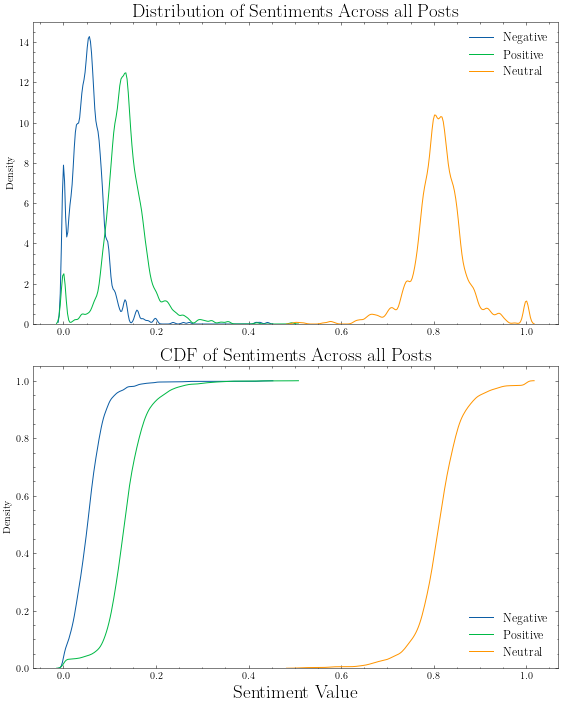

In [92]:
with plt.style.context(['science']):
    fig, axs = plt.subplots(2, 1, figsize=(8, 10))
    
    axs[0].set_title('Distribution of Sentiments Across all Posts', fontsize=19, fontweight='bold')
    sns.kdeplot(Negative, bw_method=0.1, ax=axs[0], label='Negative')
    sns.kdeplot(Positive, bw_method=0.1, ax=axs[0], label='Positive')
    sns.kdeplot(Neutral, bw_method=0.1, ax=axs[0], label='Neutral')
    axs[0].legend(fontsize=12)
    
    axs[1].set_title('CDF of Sentiments Across all Posts', fontsize=19, fontweight='bold')
    sns.kdeplot(Negative, bw_method=0.1, cumulative=True, ax=axs[1], label='Negative')
    sns.kdeplot(Positive, bw_method=0.1, cumulative=True, ax=axs[1], label='Positive')
    sns.kdeplot(Neutral, bw_method=0.1, cumulative=True, ax=axs[1], label='Neutral')
    axs[1].set_xlabel('Sentiment Value', fontsize=19)
    axs[1].legend(fontsize=12)
    
    plt.tight_layout()
    plt.show()
    fig.savefig('graph/Distribution & CDF.png', dpi=300)
    fig.savefig('graph/Distribution & CDF.jpg', dpi=300)

In [94]:
ft_data = new_df.copy()
ft_data['Positive Sentiment'] = Positive
ft_data['Negative Sentiment']= Negative
# ft_data[''

done first
done first


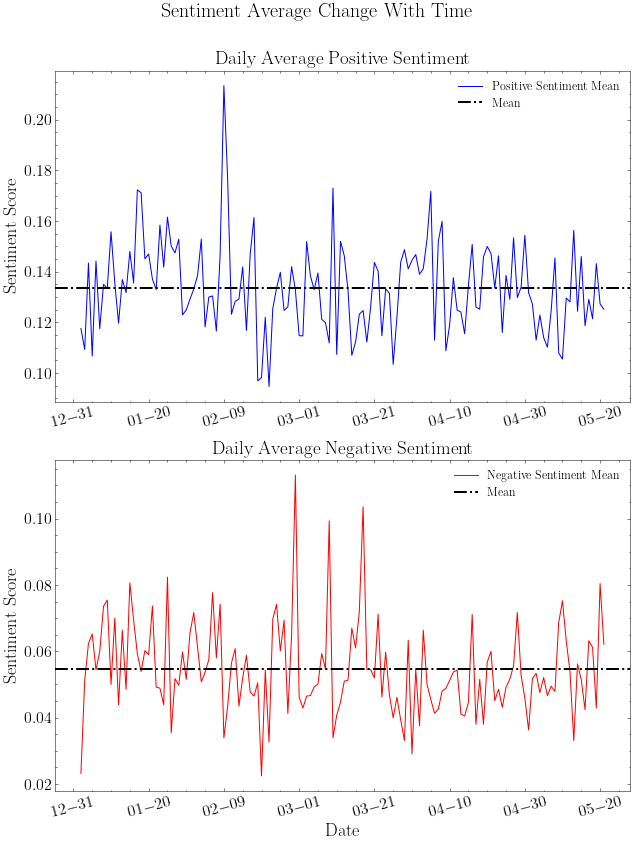

In [109]:
with plt.style.context(['science']):
    fig, axs = plt.subplots(2, 1, figsize=(9, 12))
    
    axs[0].set_title('Daily Average Positive Sentiment', fontsize=19, fontweight='bold')
    axs[0].plot(b_date_mean['Date'], b_date_mean['Positive Sentiment'], color='blue', label='Positive Sentiment Mean')
    axs[0].axhline(y=b_date_mean['Positive Sentiment'].mean(), color='black', linestyle='dashdot', linewidth=2, label='Mean')
    axs[0].set_ylabel('Sentiment Score', fontsize=18)
    axs[0].tick_params(axis='both', labelsize=16)
    axs[0].legend(fontsize=12)
    print('done first')
    
    axs[1].set_title('Daily Average Negative Sentiment', fontsize=19, fontweight='bold')
    axs[1].plot(b_date_mean['Date'], b_date_mean['Negative Sentiment'], color='red', label='Negative Sentiment Mean')
    axs[1].axhline(y=b_date_mean['Negative Sentiment'].mean(), color='black', linestyle='dashdot', linewidth=2, label='Mean')
    axs[1].set_xlabel('Date', fontsize=18)
    axs[1].set_ylabel('Sentiment Score', fontsize=18)
    axs[1].tick_params(axis='both', labelsize=16)
    axs[1].legend(fontsize=12)
    print('done first')

#         # Set the x-axis to show 10 days per point   
    axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=20))
    axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=15)
#         fig.savefig('fig1.png', dpi=300)
    axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=20))
    axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=15)
    
    plt.suptitle("Sentiment Average Change With Time", fontsize=20, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    
    plt.savefig('graph/sentiment_ave_change.png', dpi=300)
    plt.savefig('graph/sentiment_ave_change.jpg', dpi=300)
    plt.show()


# Visualization

In [146]:
new_df.head(2)

,subreddit,Date,text,sum,Open,High,Low,Close,Adj Close,Volume,...,three_day_returns,seven_day_returns,three_day_volatility,seven_day_volatility,frequency_log,new_text,Positive,Neutral,Negative,compound
0,NaN,2022-11-02,NaN,NaN,0.875238,0.888779,0.840319,0.871718,0.871718,596962768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0xPolygon,2022-11-03,Unique Chance to Own a Top Web3 Domain! nan In...,2.0,0.871787,0.981326,0.870410,0.952122,0.952122,1002654774,...,NaN,NaN,NaN,NaN,0.693147,unique chance to owntop web3 domain nan instag...,0.1,0.9,0.0,0.25


In [147]:
new_df.shape

(1430, 25)

In [150]:
new_df.columns

Index(['subreddit', 'Date', 'text', 'sum', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'name', 'returns', 'Yesterday_returns', 'gain',
       'Yesterday_gain', 'three_day_returns', 'seven_day_returns',
       'three_day_volatility', 'seven_day_volatility', 'frequency_log',
       'new_text', 'Positive', 'Neutral', 'Negative', 'compound'],
      dtype='object')

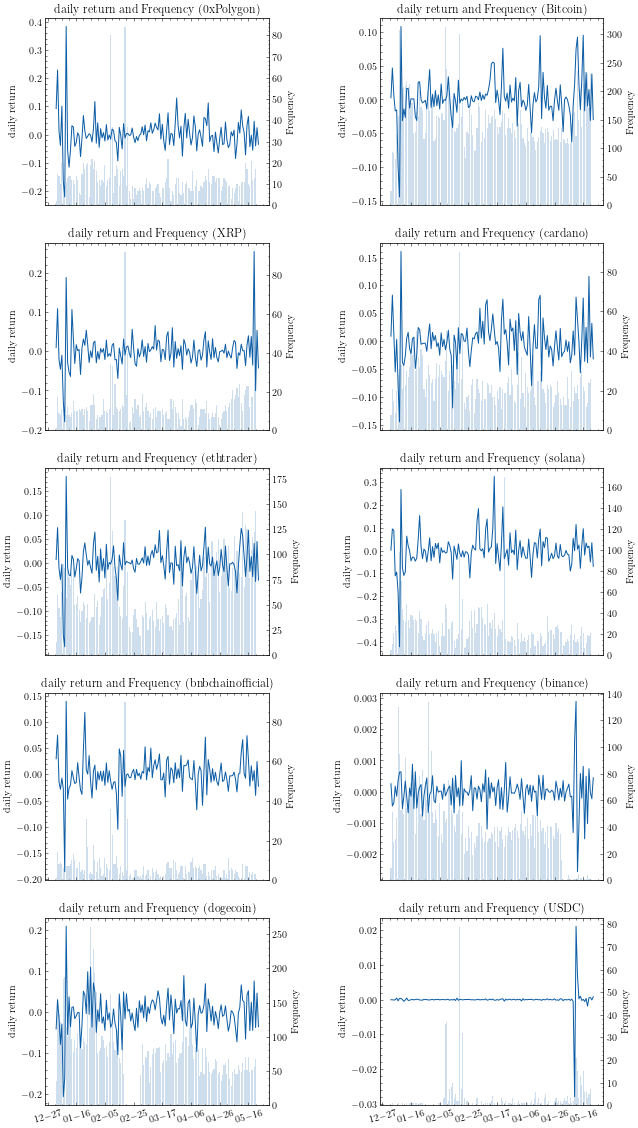

In [158]:
with plt.style.context(['science']):
    fig, axs = plt.subplots(5, 2, figsize=(10,20),sharex=True, gridspec_kw={'wspace': 0.5})
    for ax, pic in zip(axs.flat, new_df['name'].unique()):
        ax.set_title(f'daily return and Frequency ({pic})')
        ax.plot(new_df[new_df.name == pic]['Date'], new_df[new_df.name == pic]['returns'])
        ax.set_ylabel('daily return')
        ax2 = ax.twinx()
        ax2.bar(new_df[new_df.name == pic]['Date'], new_df[new_df.name == pic]['sum'], alpha=0.2)
        ax2.set_ylabel('Frequency')
#         # Set the x-axis to show 10 days per point   
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=15)
        fig.savefig('graph/daily return.png', dpi=300)

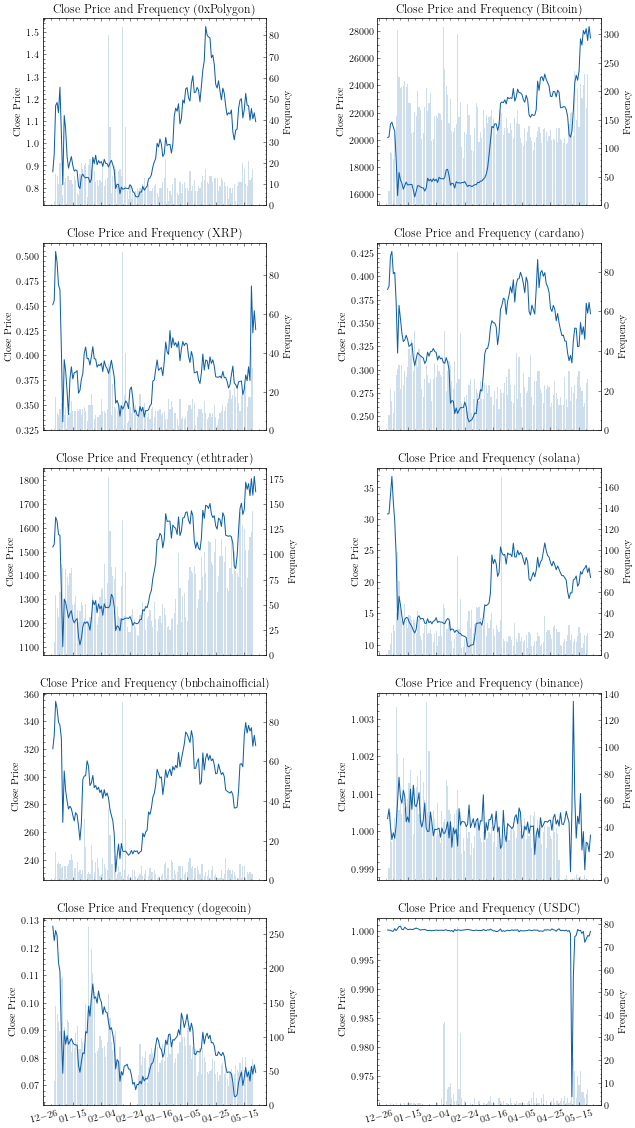

In [161]:
with plt.style.context(['science']):
    fig, axs = plt.subplots(5, 2, figsize=(10,20),sharex=True, gridspec_kw={'wspace': 0.5})
    for ax, pic in zip(axs.flat, new_df['name'].unique()):
        ax.set_title(f'Close Price and Frequency ({pic})')
        ax.plot(new_df[new_df.name == pic]['Date'], new_df[new_df.name == pic]['Close'])
        ax.set_ylabel('Close Price')
        ax2 = ax.twinx()
        ax2.bar(new_df[new_df.name == pic]['Date'], new_df[new_df.name == pic]['sum'], alpha=0.2)
        ax2.set_ylabel('Frequency')
#         # Set the x-axis to show 10 days per point   
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=15)
        fig.savefig('graph/Close.png', dpi=300)

In [368]:
new_df[['Yesterday_gain', 'three_day_returns', 'seven_day_returns',
       'three_day_volatility', 'seven_day_volatility', 'frequency_log', 'Positive', 'Neutral', 'Negative', 'sentiment', 'Weekday',
       'Stable_Coin']].describe()

,Yesterday_gain,three_day_returns,seven_day_returns,three_day_volatility,seven_day_volatility,frequency_log,Positive,Neutral,Negative,sentiment,Weekday,Stable_Coin
count,1420.000000,1400.000000,1360.000000,1410.000000,1360.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1430.000000,1430.000000
mean,0.487324,0.001218,0.002896,0.025962,0.030600,3.068649,0.133831,0.811755,0.054407,0.834178,3.000000,0.100000
std,0.500015,0.068340,0.105068,0.036759,0.030589,1.327224,0.049460,0.056905,0.038492,0.408568,1.983134,0.300105
min,0.000000,-0.573460,-0.604551,0.000001,0.000036,0.000000,0.000000,0.499000,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,-0.025494,-0.040145,0.002394,0.014000,2.197225,0.110000,0.785000,0.030250,0.954050,1.000000,0.000000
50%,0.000000,-0.000028,-0.000047,0.015983,0.024601,3.135494,0.132000,0.812000,0.052000,0.997000,3.000000,0.000000
75%,1.000000,0.020554,0.042287,0.035758,0.040695,4.077537,0.156000,0.840000,0.072000,0.999600,5.000000,0.000000
max,1.000000,0.482294,0.852197,0.488699,0.225162,5.746203,0.493000,1.000000,0.441000,1.000000,6.000000,1.000000


# Summary Statistics

In [378]:
summary_stats

Statistic,count,mean,std,min,25%,50%,75%,max,Observations
Yesterday_gain,1420.0,0.487324,0.500015,0.000000,0.000000,0.000000,1.000000,1.000000,1430.0
three_day_returns,1400.0,0.001218,0.068340,-0.573460,-0.025494,-0.000028,0.020554,0.482294,1430.0
seven_day_returns,1360.0,0.002896,0.105068,-0.604551,-0.040145,-0.000047,0.042287,0.852197,1430.0
three_day_volatility,1410.0,0.025962,0.036759,0.000001,0.002394,0.015983,0.035758,0.488699,1430.0
seven_day_volatility,1360.0,0.030600,0.030589,0.000036,0.014000,0.024601,0.040695,0.225162,1430.0
frequency_log,1334.0,3.068649,1.327224,0.000000,2.197225,3.135494,4.077537,5.746203,1430.0
Positive,1334.0,0.133831,0.049460,0.000000,0.110000,0.132000,0.156000,0.493000,1430.0
Neutral,1334.0,0.811755,0.056905,0.499000,0.785000,0.812000,0.840000,1.000000,1430.0
Negative,1334.0,0.054407,0.038492,0.000000,0.030250,0.052000,0.072000,0.441000,1430.0
sentiment,1334.0,0.834178,0.408568,-1.000000,0.954050,0.997000,0.999600,1.000000,1430.0


In [381]:
# Calculate summary statistics using pandas describe() function
summary_stats = new_df[['Yesterday_gain', 'three_day_returns', 'seven_day_returns',
       'three_day_volatility', 'seven_day_volatility', 'frequency_log',
       'new_text', 'Positive', 'Neutral', 'Negative', 'sentiment', 'Weekday',
       'Stable_Coin']].describe()

# Add a column for the number of observations
summary_stats.loc['Observations'] = new_df[['Yesterday_gain', 'three_day_returns', 'seven_day_returns',
       'three_day_volatility', 'seven_day_volatility', 'frequency_log',
       'new_text', 'Positive', 'Neutral', 'Negative', 'sentiment', 'Weekday',
       'Stable_Coin']].shape[0]

# Rename the index for the summary statistics table
summary_stats.index.name = 'Statistic'

# Transpose the summary statistics table
summary_stats = summary_stats.transpose()

# Set the desired column order
column_order = ['Observations', 'mean', 'std', 'min', 'max']

# Reorder the columns
summary_stats = summary_stats[column_order]

# Rename the columns
summary_stats.columns = ['Observations', 'Mean', 'SD', 'Min', 'Max']
summary_stats = summary_stats.round(3)

# Export the summary statistics table as LaTeX
latex_table = summary_stats.to_latex(index=True)

# # Print the LaTeX table
print(latex_table)



\begin{tabular}{lrrrrr}
\toprule
{} &  Observations &   Mean &     SD &    Min &    Max \\
\midrule
Yesterday\_gain       &        1430.0 &  0.487 &  0.500 &  0.000 &  1.000 \\
three\_day\_returns    &        1430.0 &  0.001 &  0.068 & -0.573 &  0.482 \\
seven\_day\_returns    &        1430.0 &  0.003 &  0.105 & -0.605 &  0.852 \\
three\_day\_volatility &        1430.0 &  0.026 &  0.037 &  0.000 &  0.489 \\
seven\_day\_volatility &        1430.0 &  0.031 &  0.031 &  0.000 &  0.225 \\
frequency\_log        &        1430.0 &  3.069 &  1.327 &  0.000 &  5.746 \\
Positive             &        1430.0 &  0.134 &  0.049 &  0.000 &  0.493 \\
Neutral              &        1430.0 &  0.812 &  0.057 &  0.499 &  1.000 \\
Negative             &        1430.0 &  0.054 &  0.038 &  0.000 &  0.441 \\
sentiment            &        1430.0 &  0.834 &  0.409 & -1.000 &  1.000 \\
Weekday              &        1430.0 &  3.000 &  1.983 &  0.000 &  6.000 \\
Stable\_Coin          &        1430.0 &  0.100 &  0.30

In [373]:
# Create a DataFrame with your summary statistics
summary_data = new_df[['Yesterday_gain', 'three_day_returns', 'seven_day_returns',
       'three_day_volatility', 'seven_day_volatility', 'frequency_log',
       'new_text', 'Positive', 'Neutral', 'Negative', 'sentiment', 'Weekday',
       'Stable_Coin']]

# Create a Stargazer object
stargazer = Stargazer()

# Create StatArray objects for each column of summary statistics
observations = StatArray(summary_data['Observations'].values)
mean = StatArray(summary_data['Mean'].values)
std_dev = StatArray(summary_data['Std. Dev.'].values)
min_val = StatArray(summary_data['Min'].values)
max_val = StatArray(summary_data['Max'].values)

# Add the statistics to the Stargazer object
stargazer.add_line(observations)
stargazer.add_line(mean)
stargazer.add_line(std_dev)
stargazer.add_line(min_val)
stargazer.add_line(max_val)

# Set the column labels
stargazer.set_column_labels(['Observations','Mean', 'Std. Dev.', 'Min', 'Max'])

# Set the row labels
stargazer.set_row_labels(summary_data['Variable'].values)
stargazer
# # Export the summary statistics table as LaTeX
# latex_table = stargazer.render_latex()

# # Print the LaTeX table
# print(latex_table)


ModuleNotFoundError: No module named 'stargazer.stats'

# Regression

In [299]:
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df['Weekday'] = new_df['Date'].dt.weekday

In [312]:
new_df.columns

Index(['subreddit', 'Date', 'text', 'sum', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'name', 'returns', 'Yesterday_returns', 'gain',
       'Yesterday_gain', 'three_day_returns', 'seven_day_returns',
       'three_day_volatility', 'seven_day_volatility', 'frequency_log',
       'new_text', 'Positive', 'Neutral', 'Negative', 'sentiment', 'Weekday'],
      dtype='object')

In [30]:
mod1 = ols(formula='frequency_log ~ Yesterday_returns', data = new_df).fit(cov_type='HC0') 
mod2 = ols(formula='frequency_log ~ Yesterday_gain', data = new_df).fit(cov_type='HC0') 
mod3 = ols(formula='frequency_log ~ returns', data = new_df).fit(cov_type='HC0') 
mod4 = ols(formula='frequency_log ~ gain', data = new_df).fit(cov_type='HC0') 
mod5 = ols(formula='frequency_log ~ three_day_returns', data = new_df).fit(cov_type='HC0') 
mod6 = ols(formula='frequency_log ~ three_day_volatility', data = new_df).fit(cov_type='HC0') 
mod7 = ols(formula='frequency_log ~ seven_day_returns', data = new_df).fit(cov_type='HC0') 
mod8 = ols(formula='frequency_log ~ seven_day_volatility', data = new_df).fit(cov_type='HC0') 

In [32]:
stargazer = Stargazer([mod2,mod1,mod4,mod3,mod5,mod6,mod8,mod7])
stargazer

# Render the table in the desired format
# table = stargazer.render_latex()

# Print the table
# print(table)

In [301]:
mod1 = ols(formula='frequency_log ~ Yesterday_returns+C(Weekday)', data = new_df).fit(cov_type='HC0') 
mod2 = ols(formula='frequency_log ~ Yesterday_gain+C(Weekday)', data = new_df).fit(cov_type='HC0') 
mod3 = ols(formula='frequency_log ~ returns+C(Weekday)', data = new_df).fit(cov_type='HC0') 
mod4 = ols(formula='frequency_log ~ gain+C(Weekday)', data = new_df).fit(cov_type='HC0') 
mod5 = ols(formula='frequency_log ~ three_day_returns+C(Weekday)', data = new_df).fit(cov_type='HC0') 
mod6 = ols(formula='frequency_log ~ three_day_volatility+C(Weekday)', data = new_df).fit(cov_type='HC0') 
mod7 = ols(formula='frequency_log ~ seven_day_returns+C(Weekday)', data = new_df).fit(cov_type='HC0') 
mod8 = ols(formula='frequency_log ~ seven_day_volatility+C(Weekday)', data = new_df).fit(cov_type='HC0') 

In [311]:
stargazer = Stargazer([mod2,mod1,mod4,mod3,mod5,mod6,mod7,mod8])
stargazer

# Render the table in the desired format
table = stargazer.render_latex()
# table
# Print the table
# print(table)

In [313]:
new_df['Stable_Coin'] = [1 if i == 'USDC' else 0 for i in new_df.name]

In [314]:
mod1 = ols(formula='frequency_log ~ Yesterday_returns+C(Weekday)+C(Stable_Coin)', data = new_df).fit(cov_type='HC0') 
mod2 = ols(formula='frequency_log ~ Yesterday_gain+C(Weekday)+C(Stable_Coin)', data = new_df).fit(cov_type='HC0') 
mod3 = ols(formula='frequency_log ~ returns+C(Weekday)+C(Stable_Coin)', data = new_df).fit(cov_type='HC0') 
mod4 = ols(formula='frequency_log ~ gain+C(Weekday)+C(Stable_Coin)', data = new_df).fit(cov_type='HC0') 
mod5 = ols(formula='frequency_log ~ three_day_returns+C(Weekday)+C(Stable_Coin)', data = new_df).fit(cov_type='HC0') 
mod6 = ols(formula='frequency_log ~ three_day_volatility+C(Weekday)+C(Stable_Coin)', data = new_df).fit(cov_type='HC0') 
mod7 = ols(formula='frequency_log ~ seven_day_returns+C(Weekday)+C(Stable_Coin)', data = new_df).fit(cov_type='HC0') 
mod8 = ols(formula='frequency_log ~ seven_day_volatility+C(Weekday)+C(Stable_Coin)', data = new_df).fit(cov_type='HC0') 

In [317]:
stargazer = Stargazer([mod2,mod1,mod4,mod3,mod5,mod6,mod7,mod8])
stargazer

# Render the table in the desired format
table = stargazer.render_latex()
# table
# Print the table
# print(table)

In [328]:
mod1 = ols(formula='frequency_log ~ Yesterday_returns+C(Weekday)', data = new_df[new_df.name != 'USDC']).fit(cov_type='HC0') 
mod2 = ols(formula='frequency_log ~ Yesterday_gain+C(Weekday)', data = new_df[new_df.name != 'USDC']).fit(cov_type='HC0') 
mod3 = ols(formula='frequency_log ~ returns+C(Weekday)', data = new_df[new_df.name != 'USDC']).fit(cov_type='HC0') 
mod4 = ols(formula='frequency_log ~ gain+C(Weekday)', data = new_df[new_df.name != 'USDC']).fit(cov_type='HC0') 
mod5 = ols(formula='frequency_log ~ three_day_returns+C(Weekday)', data = new_df[new_df.name != 'USDC']).fit(cov_type='HC0') 
mod6 = ols(formula='frequency_log ~ three_day_volatility+C(Weekday)', data = new_df[new_df.name != 'USDC']).fit(cov_type='HC0') 
mod7 = ols(formula='frequency_log ~ seven_day_returns+C(Weekday)', data = new_df[new_df.name != 'USDC']).fit(cov_type='HC0') 
mod8 = ols(formula='frequency_log ~ seven_day_volatility+C(Weekday)', data = new_df[new_df.name != 'USDC']).fit(cov_type='HC0') 

In [334]:
stargazer = Stargazer([mod2,mod1,mod4,mod3,mod5,mod6,mod7,mod8])
stargazer
stargazer.title('OLS Regression with Price')
# table = stargazer.render_latex()
# print(table)

In [331]:
mod1 = ols(formula='frequency_log ~ Yesterday_returns+C(Weekday)', data = new_df[new_df.name == 'USDC']).fit(cov_type='HC0') 
mod2 = ols(formula='frequency_log ~ Yesterday_gain+C(Weekday)', data = new_df[new_df.name == 'USDC']).fit(cov_type='HC0') 
mod3 = ols(formula='frequency_log ~ returns+C(Weekday)', data = new_df[new_df.name == 'USDC']).fit(cov_type='HC0') 
mod4 = ols(formula='frequency_log ~ gain+C(Weekday)', data = new_df[new_df.name != 'USDC']).fit(cov_type='HC0') 
mod5 = ols(formula='frequency_log ~ three_day_returns+C(Weekday)', data = new_df[new_df.name == 'USDC']).fit(cov_type='HC0') 
mod6 = ols(formula='frequency_log ~ three_day_volatility+C(Weekday)', data = new_df[new_df.name == 'USDC']).fit(cov_type='HC0') 
mod7 = ols(formula='frequency_log ~ seven_day_returns+C(Weekday)', data = new_df[new_df.name == 'USDC']).fit(cov_type='HC0') 
mod8 = ols(formula='frequency_log ~ seven_day_volatility+C(Weekday)', data = new_df[new_df.name == 'USDC']).fit(cov_type='HC0') 

In [335]:
stargazer = Stargazer([mod2,mod1,mod4,mod3,mod5,mod6,mod7,mod8])
# stargazer
table = stargazer.render_latex()
# print(table)

In [337]:
# new_df

In [191]:
new_df.rename(columns={'compound':'sentiment'},inplace=True)

In [339]:
mod1 = ols(formula='sentiment ~ Yesterday_returns', data = new_df).fit(cov_type='HC0') 
mod2 = ols(formula='sentiment ~ Yesterday_gain', data = new_df).fit(cov_type='HC0') 
mod3 = ols(formula='sentiment ~ returns', data = new_df).fit(cov_type='HC0') 
mod4 = ols(formula='sentiment ~ gain', data = new_df).fit(cov_type='HC0') 
mod5 = ols(formula='sentiment ~ three_day_returns', data = new_df).fit(cov_type='HC0') 
mod6 = ols(formula='sentiment ~ three_day_volatility', data = new_df).fit(cov_type='HC0') 
mod7 = ols(formula='sentiment ~ seven_day_returns', data = new_df).fit(cov_type='HC0') 
mod8 = ols(formula='sentiment ~ seven_day_volatility', data = new_df).fit(cov_type='HC0') 

In [342]:
stargazer = Stargazer([mod2,mod1,mod4,mod3,mod5,mod6,mod7,mod8])
stargazer.title('OLS Regression')
stargazer
table = stargazer.render_latex()
# print(table)

In [345]:
mod1 = ols(formula='sentiment ~ Yesterday_returns+C(Weekday)', data = new_df).fit(cov_type='HC0') 
mod2 = ols(formula='sentiment ~ Yesterday_gain+C(Weekday)', data = new_df).fit(cov_type='HC0') 
mod3 = ols(formula='sentiment ~ returns+C(Weekday)', data = new_df).fit(cov_type='HC0') 
mod4 = ols(formula='sentiment ~ gain+C(Weekday)', data = new_df).fit(cov_type='HC0') 
mod5 = ols(formula='sentiment ~ three_day_returns+C(Weekday)', data = new_df).fit(cov_type='HC0') 
mod6 = ols(formula='sentiment ~ three_day_volatility+C(Weekday)', data = new_df).fit(cov_type='HC0') 
mod7 = ols(formula='sentiment ~ seven_day_returns+C(Weekday)', data = new_df).fit(cov_type='HC0') 
mod8 = ols(formula='sentiment ~ seven_day_volatility+C(Weekday)', data = new_df).fit(cov_type='HC0') 

In [347]:
stargazer = Stargazer([mod2,mod1,mod4,mod3,mod5,mod6,mod7,mod8])
stargazer.title('OLS Regression controlling weekday')
stargazer
table = stargazer.render_latex()
# print(table)

In [348]:
mod1 = ols(formula='sentiment ~ Yesterday_returns+C(Weekday)+C(Stable_Coin)', data = new_df).fit(cov_type='HC0') 
mod2 = ols(formula='sentiment ~ Yesterday_gain+C(Weekday)+C(Stable_Coin)', data = new_df).fit(cov_type='HC0') 
mod3 = ols(formula='sentiment ~ returns+C(Weekday)+C(Stable_Coin)', data = new_df).fit(cov_type='HC0') 
mod4 = ols(formula='sentiment ~ gain+C(Weekday)+C(Stable_Coin)', data = new_df).fit(cov_type='HC0') 
mod5 = ols(formula='sentiment ~ three_day_returns+C(Weekday)+C(Stable_Coin)', data = new_df).fit(cov_type='HC0') 
mod6 = ols(formula='sentiment ~ three_day_volatility+C(Weekday)+C(Stable_Coin)', data = new_df).fit(cov_type='HC0') 
mod7 = ols(formula='sentiment ~ seven_day_returns+C(Weekday)+C(Stable_Coin)', data = new_df).fit(cov_type='HC0') 
mod8 = ols(formula='sentiment ~ seven_day_volatility+C(Weekday)+C(Stable_Coin)', data = new_df).fit(cov_type='HC0') 

In [350]:
stargazer = Stargazer([mod2,mod1,mod4,mod3,mod5,mod6,mod7,mod8])
stargazer.title('OLS Regression controlling weekday and stable Coin')
stargazer
table = stargazer.render_latex()
# print(table)

In [351]:
mod1 = ols(formula='sentiment ~ Yesterday_returns+C(Weekday)', data = new_df[new_df.name != 'USDC']).fit(cov_type='HC0') 
mod2 = ols(formula='sentiment ~ Yesterday_gain+C(Weekday)', data = new_df[new_df.name != 'USDC']).fit(cov_type='HC0') 
mod3 = ols(formula='sentiment ~ returns+C(Weekday)', data = new_df[new_df.name != 'USDC']).fit(cov_type='HC0') 
mod4 = ols(formula='sentiment ~ gain+C(Weekday)', data = new_df[new_df.name != 'USDC']).fit(cov_type='HC0') 
mod5 = ols(formula='sentiment ~ three_day_returns+C(Weekday)', data = new_df[new_df.name != 'USDC']).fit(cov_type='HC0') 
mod6 = ols(formula='sentiment ~ three_day_volatility+C(Weekday)', data = new_df[new_df.name != 'USDC']).fit(cov_type='HC0') 
mod7 = ols(formula='sentiment ~ seven_day_returns+C(Weekday)', data = new_df[new_df.name != 'USDC']).fit(cov_type='HC0') 
mod8 = ols(formula='sentiment ~ seven_day_volatility+C(Weekday)', data = new_df[new_df.name != 'USDC']).fit(cov_type='HC0') 

In [353]:
stargazer = Stargazer([mod2,mod1,mod4,mod3,mod5,mod6,mod7,mod8])
stargazer.title('OLS Regression without stable coin')
stargazer
table = stargazer.render_latex()
# print(table)

In [354]:
mod1 = ols(formula='sentiment ~ Yesterday_returns+C(Weekday)', data = new_df[new_df.name == 'USDC']).fit(cov_type='HC0') 
mod2 = ols(formula='sentiment ~ Yesterday_gain+C(Weekday)', data = new_df[new_df.name == 'USDC']).fit(cov_type='HC0') 
mod3 = ols(formula='sentiment ~ returns+C(Weekday)', data = new_df[new_df.name == 'USDC']).fit(cov_type='HC0') 
mod4 = ols(formula='sentiment ~ gain+C(Weekday)', data = new_df[new_df.name == 'USDC']).fit(cov_type='HC0') 
mod5 = ols(formula='sentiment ~ three_day_returns+C(Weekday)', data = new_df[new_df.name == 'USDC']).fit(cov_type='HC0') 
mod6 = ols(formula='sentiment ~ three_day_volatility+C(Weekday)', data = new_df[new_df.name == 'USDC']).fit(cov_type='HC0') 
mod7 = ols(formula='sentiment ~ seven_day_returns+C(Weekday)', data = new_df[new_df.name == 'USDC']).fit(cov_type='HC0') 
mod8 = ols(formula='sentiment ~ seven_day_volatility+C(Weekday)', data = new_df[new_df.name == 'USDC']).fit(cov_type='HC0') 

In [355]:
stargazer = Stargazer([mod2,mod1,mod4,mod3,mod5,mod6,mod7,mod8])
stargazer.title('OLS Regression only stable coin')
stargazer
table = stargazer.render_latex()
print(table)

\begin{table}[!htbp] \centering
  \caption{OLS Regression only stable coin}
\begin{tabular}{@{\extracolsep{5pt}}lcccccccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{8}{c}{\textit{Dependent variable:}} \
\cr \cline{8-9}
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6) & (7) & (8) \\
\hline \\[-1.8ex]
 C(Weekday)[T.1] & -0.159$^{}$ & -0.138$^{}$ & -0.137$^{}$ & -0.129$^{}$ & -0.201$^{}$ & -0.143$^{}$ & -0.173$^{}$ & -0.176$^{}$ \\
  & (0.158) & (0.158) & (0.161) & (0.159) & (0.155) & (0.160) & (0.164) & (0.159) \\
 C(Weekday)[T.2] & -0.195$^{}$ & -0.176$^{}$ & -0.183$^{}$ & -0.173$^{}$ & -0.201$^{}$ & -0.186$^{}$ & -0.184$^{}$ & -0.184$^{}$ \\
  & (0.195) & (0.196) & (0.196) & (0.195) & (0.201) & (0.195) & (0.196) & (0.197) \\
 C(Weekday)[T.3] & -0.043$^{}$ & -0.024$^{}$ & -0.027$^{}$ & -0.016$^{}$ & -0.035$^{}$ & -0.033$^{}$ & -0.032$^{}$ & -0.031$^{}$ \\
  & (0.164) & (0.166) & (0.163) & (0.164) & (0.164) & (0.166) & (0.165) & (0.162) \\
 C(Weekday)[T.4] & -0.261$^{}$ & -0.257$^{

In [ ]:
models_fre = []
for var in DV_1w:
    
    # Define the model
#     mod = ols(formula=f'{var} ~ frequency', data = test).fit(cov_type='HC0') 
    mod = ols(formula=f'{dep_var} ~ {var}', data = new_df).fit(cov_type='HC0') 
    print(var)

    models.append(mod)

In [ ]:
DV_1w

In [248]:
#Defining a list of dependent variables
DV_1w = new_df.columns[11:19].tolist()
dep_var = new_df.columns[19]
sen_var = new_df.columns[24]

In [252]:
models = []
for var in DV_1w:
    
    # Define the model
#     mod = ols(formula=f'{var} ~ frequency', data = test).fit(cov_type='HC0') 
    mod = ols(formula=f'{dep_var} ~ {var}', data = new_df).fit(cov_type='HC0') 
    print(var)

    models.append(mod)

returns
Yesterday_returns
gain
Yesterday_gain
three_day_returns
seven_day_returns
three_day_volatility
seven_day_volatility


In [250]:
models

In [255]:
# Create an empty list to store the ordered models
ordered_models = []

# Define the desired order of models (optional if you want to keep the existing order)
desired_order = list(range(1, len(models) + 1))

# Sort the models based on their position in the desired order
sorted_models = [x for _, x in sorted(zip(desired_order, models))]

# Iterate over the sorted models and add them to the ordered list
for model in sorted_models:
    ordered_models.append(model)

# Create a Stargazer object with the ordered models
stargazer = Stargazer(ordered_models)
stargazer

In [251]:
Stargazer(models)

In [ ]:
#Looking at the results
table_result = Stargazer(models)

#Adding the variable names to each model
# table_result.custom_columns(DV_1w, [1 for i in range(len(DV_1w))])
table_result

In [245]:
models = []
n = len(DV_1w)

for i, var in enumerate(DV_1w):
    row = []
    for j in range(i):
        row.append(np.nan)
    mod = ols(formula=f'{sen_var} ~ {var}', data=new_df).fit(cov_type='HC0')
    row.append(mod)
    models.append(row)

# Looking at the results
table_result = Stargazer(models)

# Adding the variable names to each model
table_result.custom_columns(DV_1w, [1 for _ in range(n)])

# Render the LaTeX table
latex_table = table_result.render_latex()

print(latex_table)

ValueError: Please use trained OLS models as inputs

In [244]:
models = []
for var in DV_1w:
    
    # Define the model
#     mod = ols(formula=f'{var} ~ frequency', data = test).fit(cov_type='HC0') 
    mod = ols(formula=f'{sen_var} ~ {var}', data = new_df).fit(cov_type='HC0') 

    models.append(mod)
    
#Looking at the results
table_result = Stargazer(models)

#Adding the variable names to each model
# table_result.custom_columns(DV_1w, [1 for i in range(len(DV_1w))])
table_result
print(table_result.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcccccccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{8}{c}{\textit{Dependent variable:}} \
\cr \cline{8-9}
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6) & (7) & (8) \\
\hline \\[-1.8ex]
 Intercept & 0.834$^{***}$ & 0.836$^{***}$ & 0.833$^{***}$ & 0.830$^{***}$ & 0.835$^{***}$ & 0.836$^{***}$ & 0.825$^{***}$ & 0.784$^{***}$ \\
  & (0.011) & (0.011) & (0.016) & (0.016) & (0.011) & (0.011) & (0.017) & (0.019) \\
 Yesterday_gain & & & & 0.009$^{}$ & & & & \\
  & & & & (0.022) & & & & \\
 Yesterday_returns & & 0.028$^{}$ & & & & & & \\
  & & (0.276) & & & & & & \\
 gain & & & 0.002$^{}$ & & & & & \\
  & & & (0.022) & & & & & \\
 returns & 0.048$^{}$ & & & & & & & \\
  & (0.312) & & & & & & & \\
 seven_day_returns & & & & & & 0.007$^{}$ & & \\
  & & & & & & (0.081) & & \\
 seven_day_volatility & & & & & & & & 1.662$^{***}$ \\
  & & & & & & & & (0.429) \\
 three_day_returns & & & & & 0.074$^{}$ & & & \\
  & & & & & (

In [207]:
table_result.title('OLS Regression with Sentiment')
# table_result.dependent_variable_name('Dependent Variable')
table_result
# stargazer.column_separators(7,1)
# print(table_result.render_latex())

\begin{table}[!htbp] \centering
  \caption{OLS Regression with Sentiment}
\begin{tabular}{@{\extracolsep{5pt}}lcccccccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{8}{c}{\textit{Dependent variable:}} \
\cr \cline{8-9}
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6) & (7) & (8) \\
\hline \\[-1.8ex]
 Intercept & 0.834$^{***}$ & 0.836$^{***}$ & 0.833$^{***}$ & 0.830$^{***}$ & 0.835$^{***}$ & 0.836$^{***}$ & 0.825$^{***}$ & 0.784$^{***}$ \\
  & (0.011) & (0.011) & (0.016) & (0.016) & (0.011) & (0.011) & (0.017) & (0.019) \\
 Yesterday_gain & & & & 0.009$^{}$ & & & & \\
  & & & & (0.022) & & & & \\
 Yesterday_returns & & 0.028$^{}$ & & & & & & \\
  & & (0.276) & & & & & & \\
 gain & & & 0.002$^{}$ & & & & & \\
  & & & (0.022) & & & & & \\
 returns & 0.048$^{}$ & & & & & & & \\
  & (0.312) & & & & & & & \\
 seven_day_returns & & & & & & 0.007$^{}$ & & \\
  & & & & & & (0.081) & & \\
 seven_day_volatility & & & & & & & & 1.662$^{***}$ \\
  & & & & & & & & (0.429) \\
 three_day_returns &

In [208]:
new_df.head(2)

,subreddit,Date,text,sum,Open,High,Low,Close,Adj Close,Volume,...,three_day_returns,seven_day_returns,three_day_volatility,seven_day_volatility,frequency_log,new_text,Positive,Neutral,Negative,sentiment
0,NaN,2022-11-02,NaN,NaN,0.875238,0.888779,0.840319,0.871718,0.871718,596962768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0xPolygon,2022-11-03,Unique Chance to Own a Top Web3 Domain! nan In...,2.0,0.871787,0.981326,0.870410,0.952122,0.952122,1002654774,...,NaN,NaN,NaN,NaN,0.693147,unique chance to owntop web3 domain nan instag...,0.1,0.9,0.0,0.25


In [215]:
test = new_df.copy()
test['Date'] = pd.to_datetime(test['Date'])
test['Weekday'] = test['Date'].dt.weekday
# test
# Create dummy variables for each day of the week
weekday_dummies = pd.get_dummies(test['Weekday'], prefix='Weekday', drop_first=True)

# Concatenate the weekday dummies with the original DataFrame
test = pd.concat([test, weekday_dummies], axis=1)

In [232]:
test['Stable_Coin'] = [1 if i == 'USDC' else 0 for i in test.name]

In [237]:
itest = test[test['Stable_Coin'] == 1]

In [238]:
models = []
for var in DV_1w:
    
    # Define the model
#     mod = ols(formula=f'{var} ~ frequency', data = test).fit(cov_type='HC0') 
    mod = ols(formula=f'{dep_var} ~ {var}+C(Weekday)', data = itest).fit(cov_type='HC0') 

    models.append(mod)
    
#Looking at the results
table_result = Stargazer(models)

#Adding the variable names to each model
# table_result.custom_columns(DV_1w, [1 for i in range(len(DV_1w))])
table_result

In [231]:
mod = ols(formula='sentiment ~ Weekday_1+Weekday_2+Weekday_3+Weekday_4+Weekday_5+Weekday_6', data = test).fit(cov_type='HC0') 
mod.summary()
models = []
for var in DV_1w:
    
    # Define the model
#     mod = ols(formula=f'{var} ~ frequency', data = test).fit(cov_type='HC0') 
    mod = ols(formula=f'{dep_var} ~ {var}+Weekday_1+Weekday_2+Weekday_3+Weekday_4+Weekday_5+Weekday_6+C(name)', data = test).fit(cov_type='HC0') 

    models.append(mod)
    
#Looking at the results
table_result = Stargazer(models)

#Adding the variable names to each model
# table_result.custom_columns(DV_1w, [1 for i in range(len(DV_1w))])
table_result

In [224]:
test.name.unique().tolist()

['0xPolygon',
 'Bitcoin',
 'XRP',
 'cardano',
 'ethtrader',
 'solana',
 'bnbchainofficial',
 'binance',
 'dogecoin',
 'USDC']

In [204]:
mod = ols(formula='frequency_log ~ returns+Yesterday_returns+gain+Yesterday_gain+three_day_returns+seven_day_returns+three_day_volatility+seven_day_volatility', data = new_df).fit(cov_type='HC0') 

In [205]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          frequency_log   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     4.013
Date:                Tue, 16 May 2023   Prob (F-statistic):           0.000102
Time:                        10:58:18   Log-Likelihood:                -2159.6
No. Observations:                1278   AIC:                             4337.
Df Residuals:                    1269   BIC:                             4384.
Df Model:                           8                                         
Covariance Type:                  HC0                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.0844      0.092     33.573      0.000       2.904       3.264
returns                  0.9759      1.232      0.792      0.428      -1.440       3.391
Yesterday_returns        1.0527      1.190      0.885      0.376      -1.279       3.384
gain                    -0.2143      0.097     -2.211      0.027      -0.404      -0.024
Yesterday_gain          -0.1835      0.096     -1.915      0.055      -0.371       0.004
three_day_returns        0.4568      0.797      0.573      0.567      -1.105       2.019
seven_day_returns        0.1802      0.376      0.479      0.632      -0.557       0.917
three_day_volatility     0.1877      1.144      0.164      0.870      -2.054       2.430
seven_day_volatility     5.5166      1.359      4.059      0.000       2.853       8.180
==============================================================================
Omnibus:                       51.451   Durbin-Watson:                   0.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.150
Skew:                          -0.302   Prob(JB):                     1.41e-08
Kurtosis:                       2.440   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [ ]:
stargazer = Stargazer([est_mod1a,est_mod3a,est_mod2a])
stargazer.title('OLS Regression with Price')
stargazer.dependent_variable_name('Dependent Variable')
stargazer
# stargazer.column_separators(7,1)
# print(stargazer.render_latex())

# 3. Regression Analysis

In [161]:
finaldf.columns

Index(['Date', 'text', 'sum', 'postornot', 'relatedornot', 'index', 'Date.1',
       'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'return',
       'go up or down', 'Return'],
      dtype='object')

In [281]:
est_mod1a = ols('Close~postornot',data=finaldf).fit()
est_mod1a.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0636,0.010,6.377,0.000,0.044,0.083
postornot,0.0115,0.010,1.138,0.257,-0.008,0.031


In [282]:
est_mod1b = ols('Return~postornot',data=finaldf).fit()
est_mod1b.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0125,0.035,0.358,0.721,-0.057,0.082
postornot,-0.0154,0.035,-0.434,0.665,-0.085,0.055


In [283]:
est_mod2a = ols('Close~sum',data=finaldf).fit()
est_mod2a.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0665,0.002,33.590,0.000,0.063,0.070
sum,0.0005,8.33e-05,5.422,0.000,0.000,0.001


In [286]:
est_mod2b = ols('Return~sum',data=finaldf).fit()
est_mod2b.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0111,0.007,-1.493,0.137,-0.026,0.004
sum,0.0005,0.000,1.468,0.144,-0.000,0.001


In [287]:
est_mod3a = ols('Close~relatedornot',data=finaldf).fit()
est_mod3a.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0754,0.002,46.424,0.000,0.072,0.079
relatedornot,-0.0015,0.003,-0.517,0.606,-0.007,0.004


In [288]:
est_mod3b = ols('Return~relatedornot',data=finaldf).fit()
est_mod3b.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0040,0.006,-0.701,0.485,-0.015,0.007
relatedornot,0.0043,0.010,0.441,0.660,-0.015,0.024


In [339]:
stargazer = Stargazer([est_mod1a,est_mod3a,est_mod2a])
stargazer.title('OLS Regression with Price')
stargazer.dependent_variable_name('Dependent Variable')
stargazer
# stargazer.column_separators(7,1)

In [368]:
# print(stargazer.render_latex())

In [342]:
stargazer = Stargazer([est_mod1b,est_mod3b,est_mod2b])
stargazer.title('OLS Regression with Daily Return')
stargazer.dependent_variable_name('Dependent Variable')
stargazer
# stargazer.column_separators(7,1)

In [369]:
# print(stargazer.render_latex())

# 4. Sentiment Analysis

## 4.1 Afinn: Wordlist-based approch

In [29]:
new_test = new_df.copy()

In [30]:
afinn = Afinn(language = 'en', emoticons=True)

In [31]:
new_list=[]
for i in new_test['text']:
    i=str(i)
    new_list.append(re.sub('@\w*','',i))
    
new_test['text_clean']=new_list

In [32]:
new_test['sentiment_score'] = new_test['text_clean'].progress_apply(lambda x: afinn.score(x))

  0%|          | 0/1430 [00:00<?, ?it/s]

In [ ]:
new_test['sentiment_score'] = new_test['text_clean'].progress_apply(lambda x: afinn.score(x))

In [33]:
new_test['length_sentence'] = new_test['text_clean'].progress_apply(lambda x: len(x.split()))

  0%|          | 0/1430 [00:00<?, ?it/s]

In [34]:
new_test['sentiment_score_normalized'] = new_test['sentiment_score'] / new_test['length_sentence']

In [37]:
print(min(new_test.sentiment_score_normalized))
print(max(new_test.sentiment_score_normalized))
print(np.mean(new_test.sentiment_score_normalized))

-0.6696035242290749
0.4
0.04049488918682473


## 4.2 Bert

In [38]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

In [40]:
sentiment_analysis = pipeline(model="nlptown/bert-base-multilingual-uncased-sentiment")
sanction_corpus = [x for x in new_test['text_clean']]
# sanction_corpus

In [42]:
sentiment_analysis(sanction_corpus[0])[0]

{'label': '2 stars', 'score': 0.26056790351867676}

In [44]:
# Set up the inference pipeline using a model from the 🤗 Hubb
 
# Let's run the sentiment analysis on each tweet
tweets = []
for tweet in tqdm(sanction_corpus):
    tweet = str(tweet)
    try:
        sentiment = sentiment_analysis(tweet)
        tweets.append(sentiment[0]['score'])
    except:
        tweets.append(np.nan)
        pass

new_test['Bert_sentiment']=tweets

  0%|          | 0/1430 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (999 > 512). Running this sequence through the model will result in indexing errors


In [45]:
print(min(tweets))
print(max(tweets))
print(np.mean(tweets))

# Bert will provide lots of nan value

0.21869532763957977
0.9037908315658569
nan


## 4.3 Distilbert

In [47]:
sentiment_analysis_2 = pipeline(model="distilbert-base-uncased-finetuned-sst-2-english")

In [48]:
sentiment_analysis_2(sanction_corpus[0])

[{'label': 'POSITIVE', 'score': 0.9541463851928711}]

In [49]:
# Set up the inference pipeline using a model from the 🤗 Hubb
 
tweets_2 = []
for tweet in tqdm(sanction_corpus):
    tweet = str(tweet)
    try:
        sentiment = sentiment_analysis_2(tweet)
        tweets_2.append(sentiment[0]['score'])
    except:
        tweets_2.append(np.nan)

  0%|          | 0/1430 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (964 > 512). Running this sequence through the model will result in indexing errors


In [50]:
print(min(tweets_2))
print(max(tweets_2))
print(np.mean(tweets_2))
# lots of nan value

0.5300015211105347
0.9997994303703308
nan


In [365]:
sent_distilbert = pd.DataFrame(tweets_2)
finaldf_new2 = pd.concat([finaldf_new,sent_distilbert],axis=1,join='outer')
# finaldf_new2.head()

## 4.4 twitter-roberta

In [52]:
sentiment_analysis_3 = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [54]:
tweets_3 = []
for tweet in tqdm(sanction_corpus):
    try:
        sentiment = sentiment_analysis_3(tweet)
        tweets_3.append(sentiment[0]['score'])
    except:
        tweets_3.append(np.nan)
        pass

  0%|          | 0/1430 [00:00<?, ?it/s]

In [56]:
tweets_3

[0.6808651685714722,
 0.8563684225082397,
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 0.7947615385055542,
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 0.9619404077529907,
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 0.8588888645172119,
 {nan},
 {nan},
 0.7149624824523926,
 {nan},
 0.9591405987739563,
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 0.5974303483963013,
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 0.8831436634063721,
 0.8516334295272827,
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan},
 {nan}

In [55]:
print(min(tweets_3))
print(max(tweets_3))
print(np.mean(tweets_3))

TypeError: '<' not supported between instances of 'set' and 'float'

In [364]:
sent_roberta = pd.DataFrame(tweets_3)
finaldf_new3 = pd.concat([finaldf_new2,sent_roberta],axis=1,join='outer')
# finaldf_new3.head()

In [271]:
finaldf_new3.to_csv('final_sentment.csv',index=None)

## 4.5 reg with sentiment scores

In [274]:
finaldf_new3.columns

Index(['Date', 'text', 'sum', 'postornot', 'relatedornot', 'index', 'Date.1',
       'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'return',
       'go up or down', 'Return', 'text_clean', 'sentiment_score',
       'length_sentence', 'sentiment_score_normalized', 'label_bert',
       'score_bert', 'label_distilbert', 'score_distilbert', 'label_roberta',
       'score_roberta'],
      dtype='object')

In [352]:
est_mod_sa11 = ols('Return~sentiment_score_normalized',data=finaldf_new3).fit()
est_mod_sa11.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0012,0.005,-0.230,0.818,-0.011,0.009
sentiment_score_normalized,-0.0191,0.033,-0.581,0.562,-0.084,0.046


In [351]:
est_mod_sa12 = ols('Close~sentiment_score_normalized',data=finaldf_new3).fit()
est_mod_sa12.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0755,0.001,51.041,0.000,0.073,0.078
sentiment_score_normalized,-0.0083,0.009,-0.888,0.376,-0.027,0.010


In [350]:
est_mod_sa21 = ols('Return~score_bert',data=finaldf_new3).fit()
est_mod_sa21.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0033,0.009,0.346,0.730,-0.015,0.022
score_bert,-0.0175,0.025,-0.706,0.481,-0.067,0.031


In [353]:
est_mod_sa22 = ols('Close~score_bert',data=finaldf_new3).fit()
est_mod_sa22.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0764,0.003,28.307,0.000,0.071,0.082
score_bert,-0.0045,0.007,-0.638,0.525,-0.019,0.009


In [354]:
est_mod_sa31 = ols('Return~score_distilbert',data=finaldf_new3).fit()
est_mod_sa31.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0023,0.012,0.188,0.851,-0.021,0.026
score_distilbert,-0.0059,0.014,-0.435,0.664,-0.033,0.021


In [355]:
est_mod_sa32 = ols('Close~score_distilbert',data=finaldf_new3).fit()
est_mod_sa32.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0803,0.003,23.711,0.000,0.074,0.087
score_distilbert,-0.0066,0.004,-1.726,0.086,-0.014,0.001


In [356]:
est_mod_sa41 = ols('Return~score_roberta',data=finaldf_new3).fit()
est_mod_sa41.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0061,0.009,0.661,0.510,-0.012,0.024
score_roberta,-0.0152,0.014,-1.078,0.282,-0.043,0.013


In [357]:
est_mod_sa42 = ols('Close~score_roberta',data=finaldf_new3).fit()
est_mod_sa42.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0830,0.003,32.454,0.000,0.078,0.088
score_roberta,-0.0143,0.004,-3.663,0.000,-0.022,-0.007


In [363]:
stargazer = Stargazer([est_mod_sa22,est_mod_sa32,est_mod_sa42,est_mod_sa12])
stargazer.title('OLS Regression with Price')
stargazer.dependent_variable_name('Dependent Variable')
# stargazer

In [362]:
# print(stargazer.render_latex())

In [361]:
stargazer = Stargazer([est_mod_sa21,est_mod_sa31,est_mod_sa41,est_mod_sa11])
stargazer.title('OLS Regression with Daily Return(sentiment)')
stargazer.dependent_variable_name('Dependent Variable')
# print(stargazer.render_latex())

## 4.6 another method: supervised machine learning (self trainning sentiment classifiers)

In [10]:
Elon = pd.read_csv('Elon.csv')

In [12]:
Elon.shape

(3193, 4)

In [15]:
#Importing the data
unlabled_data,tobelabled_data = train_test_split(Elon, test_size=0.2, random_state=42)

In [16]:
tobelabled_data.shape

(639, 4)

In [17]:
unlabled_data.shape

(2554, 4)

In [18]:
tobelabled_data.to_csv('tobelabled_data.csv')

In [186]:
# After manually labeling
tobelabled_data = pd.read_csv('tobelabled_data.csv', index_col=0)
# tobelabled_data.head(2)

In [39]:
type(tobelabled_data.sentiment[0])

numpy.int64

In [40]:
tobelabled_data.sentiment.value_counts()

1    334
2    195
0    110
Name: sentiment, dtype: int64

In [41]:
x_train, x_test, y_train, y_test = train_test_split(tobelabled_data['text'], tobelabled_data['sentiment'], test_size=0.2, random_state=42)

In [42]:
train_corpus = [x for x in x_train]
train_labels = [x for x in y_train]

In [43]:
len(train_labels)

511

In [44]:
Counter(train_labels)

Counter({1: 266, 2: 159, 0: 86})

In [45]:
test_corpus = [x for x in x_test]
test_labels = [x for x in y_test]

In [46]:
len(test_labels)

128

In [47]:
Counter(test_labels)

Counter({1: 68, 0: 24, 2: 36})

In [48]:
# vectorizing the training part of the corpus
vectorizer = TfidfVectorizer() # the default ngram range is (1,1)

train_features = vectorizer.fit_transform(train_corpus)
feature_names = vectorizer.get_feature_names()
sparse_array = train_features.toarray()

In [49]:
test_features = vectorizer.transform(test_corpus)

In [50]:
# Create logistic regression object
lr = LogisticRegression(max_iter=1500, C=20, penalty="l2")

# Train the model using the training sets
lr.fit(train_features, train_labels)

# Make predictions using the testing set
test_pred = lr.predict(test_features)

# compare the predictions to the gold labels
print("Accuracy for LR with default parameters:", accuracy_score(test_labels, test_pred))
print('Precision for LR with default parameters:'+str(precision_score(test_labels, test_pred,average='macro')))
print('Recall for LR with default parameters:'+str(recall_score(test_labels, test_pred,average='macro')))

Accuracy for LR with default parameters: 0.578125
Precision for LR with default parameters:0.5330393885949442
Recall for LR with default parameters:0.48638344226579516


In [51]:
# defining the incremental 10% splits for the learning curve
train_sizes = list(np.arange(0.1,1.1,0.1).round(1))
print(train_sizes)

# getting the data for the learning curve:
# logistic regression with 5-fold cross-validation over training data
train_sizes, train_scores, cv_scores = learning_curve(estimator = LogisticRegression(max_iter=1500,C=20,penalty='l2'),
                                                      X=train_features, 
                                                      y=train_labels,
                                                      train_sizes =train_sizes, # the train sizes we have defined above
                                                      cv=5,
                                                      n_jobs = -1) # 5-fold cross-validation

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [52]:
def plot_curve(train_scores, val_scores):
    """A helper function to plot the train scores array
    against the validation scores"""

    # Calculate the values to plot

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Plot the learning and cross-validation curve

    plt.rcParams['font.size'] = '16'
    fig, ax = plt.subplots( figsize=(10,6) )
    plt.xlim([10,400])
    plt.ylim([0.4, 1.2])
    plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='red')
    plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')
    plt.title('Learning Curve (Logistic Regression)')
    plt.xlabel('Training Data Size')
    plt.ylabel('Model accuracy')
    plt.grid()
    plt.legend(loc='lower right')

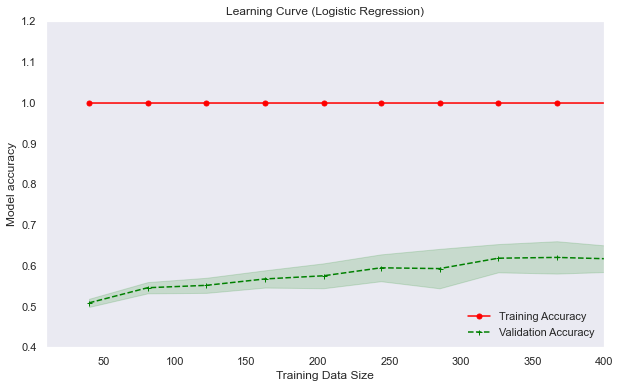

In [53]:
#plotting the results for cross-validation
plot_curve(train_scores, cv_scores)
plt.savefig('the learning curve_LG.png', format='png')

In [54]:
# default LinearSVC
linSVC = LinearSVC()
linSVC.fit(train_features, train_labels)
linSVC_test_pred = linSVC.predict(test_features)
print("Accuracy for SVM with default parameters:", accuracy_score(test_labels, linSVC_test_pred))
print('Precision for SVM with default parameters:'+str(precision_score(test_labels, linSVC_test_pred,average='macro')))
print('Recall for SVM with default parameters:'+str(recall_score(test_labels, linSVC_test_pred,average='macro')))

Accuracy for SVM with default parameters: 0.578125
Precision for SVM with default parameters:0.5330393885949442
Recall for SVM with default parameters:0.48638344226579516


In [55]:
# defining the incremental 10% splits for the learning curve
train_sizes = list(np.arange(0.1,1.1,0.1).round(1))
print(train_sizes)

# getting the data for the learning curve:
# logistic regression with 5-fold cross-validation over training data
train_sizes, train_scores, cv_scores = learning_curve(estimator = LinearSVC(),
                                                      X=train_features, 
                                                      y=train_labels,
                                                      train_sizes =train_sizes, # the train sizes we have defined above
                                                      cv=5,
                                                      n_jobs = -1) # 5-fold cross-validation

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [56]:
def plot_curve(train_scores, val_scores):
    """A helper function to plot the train scores array
    against the validation scores"""

    # Calculate the values to plot

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Plot the learning and cross-validation curve

    plt.rcParams['font.size'] = '16'
    fig, ax = plt.subplots( figsize=(10,6) )
    plt.xlim([10,400])
    plt.ylim([0.4, 1.2])
    plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='red')
    plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')
    plt.title('Learning Curve (Support vector machine)')
    plt.xlabel('Training Data Size')
    plt.ylabel('Model accuracy')
    plt.grid()
    plt.legend(loc='lower right')

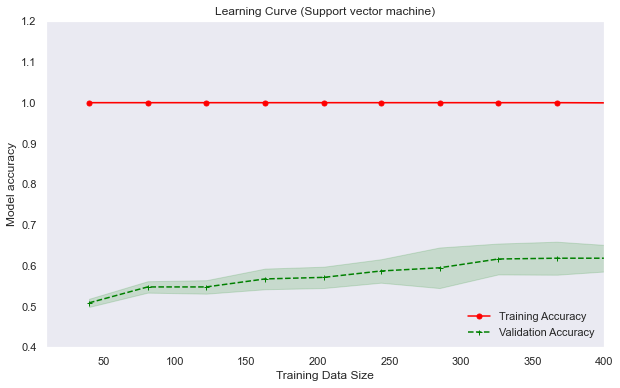

In [57]:
#plotting the results for cross-validation
plot_curve(train_scores, cv_scores)
plt.savefig('the learning curve_SVM.png', format='png')

In [58]:
nb = MultinomialNB(alpha=1.0)
nb.fit(train_features, train_labels)
nb_test_pred = nb.predict(test_features)
print("Accuracy for Naive Bayes with default parameters:", accuracy_score(test_labels, nb_test_pred))
print('Precision for Naive Bayes with default parameters::'+str(precision_score(test_labels, nb_test_pred,average='macro')))
print('Recall for Naive Bayes with default parameters:'+str(recall_score(test_labels, nb_test_pred,average='macro')))

Accuracy for Naive Bayes with default parameters: 0.5703125
Precision for Naive Bayes with default parameters::0.4001554001554002
Recall for Naive Bayes with default parameters:0.3883442265795207


/Users/buluo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
# defining the incremental 10% splits for the learning curve
train_sizes = list(np.arange(0.1,1.1,0.1).round(1))
print(train_sizes)

# getting the data for the learning curve:
# logistic regression with 5-fold cross-validation over training data
train_sizes, train_scores, cv_scores = learning_curve(estimator = MultinomialNB(),
                                                      X=train_features, 
                                                      y=train_labels,
                                                      train_sizes =train_sizes, # the train sizes we have defined above
                                                      cv=5,
                                                      n_jobs = -1) # 5-fold cross-validation

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [60]:
def plot_curve(train_scores, val_scores):
    """A helper function to plot the train scores array
    against the validation scores"""

    # Calculate the values to plot

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Plot the learning and cross-validation curve

    plt.rcParams['font.size'] = '16'
    fig, ax = plt.subplots( figsize=(10,6) )
    plt.xlim([10,400])
    plt.ylim([0.4, 1.2])
    plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='red')
    plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')
    plt.title('Learning Curve (Naive Bayes)')
    plt.xlabel('Training Data Size')
    plt.ylabel('Model accuracy')
    plt.grid()
    plt.legend(loc='lower right')

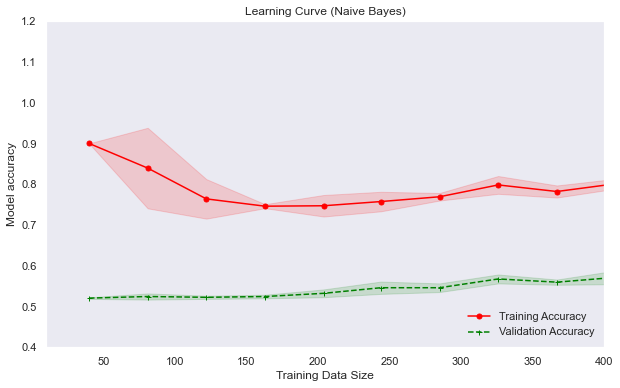

In [61]:
#plotting the results for cross-validation
plot_curve(train_scores, cv_scores)
plt.savefig('the learning curve_NB.png', format='png')

In [62]:
# collecting the accuracy data data
results = {"Accuracy":{"LR":0, "SVC":1,"NB":0},"Precision score":{"LR":0, "SVC":1,"NB":0},"Recall score":{"LR":0, "SVC":1,"NB":0},"F1 score":{"LR":1, "SVC":0,"NB":0}}
results["Accuracy"]["LR"] = accuracy_score(test_labels, test_pred)
results["Accuracy"]["SVC"] = accuracy_score(test_labels, linSVC_test_pred)
results["Accuracy"]["NB"] = accuracy_score(test_labels, nb_test_pred)

In [63]:
# adding F1 data
results["F1 score"]["LR"] = f1_score(test_labels, test_pred, average="macro")
results["F1 score"]["SVC"] = f1_score(test_labels, linSVC_test_pred, average="macro")
results["F1 score"]["NB"] = f1_score(test_labels, nb_test_pred, average="macro")
# results

In [64]:
# adding Precision data
results["Precision score"]["LR"] = precision_score(test_labels, test_pred, average="macro")
results["Precision score"]["SVC"] = precision_score(test_labels, linSVC_test_pred, average="macro")
results["Precision score"]["NB"] = precision_score(test_labels, nb_test_pred, average="macro")
# results

/Users/buluo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
# adding Recall data
results["Recall score"]["LR"] = recall_score(test_labels, test_pred, average="macro")
results["Recall score"]["SVC"] = recall_score(test_labels, linSVC_test_pred, average="macro")
results["Recall score"]["NB"] = recall_score(test_labels, nb_test_pred, average="macro")
# results

In [66]:
results_df = pd.DataFrame(results)
results_df.round(3).to_excel('model_sit.xlsx')
results_df

,Accuracy,Precision score,Recall score,F1 score
LR,0.578125,0.533039,0.486383,0.494008
SVC,0.578125,0.533039,0.486383,0.494008
NB,0.570312,0.400155,0.388344,0.337129
